In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from datetime import datetime, timedelta


In [2]:
# Check installed versions - there is a difference bewtween pyproj <2.0 and >2.0
import pyproj
print(pyproj.__version__)
print(gpd.__version__)
    

1.9.6
0.6.1


In [3]:
satman = gpd.read_file("./data/satskred/SHP_merge/AvalDet_man_Merge.shp")
satman["t_1"] = pd.to_datetime(satman["Date"])
satman["t_0"] = satman["t_1"]-timedelta(days=6)
satman["days_interval"] = satman.t_1 - satman.t_0

In [4]:
print(satman["geometry"])
print(satman.crs)

0     POLYGON ((135612.724 6810714.395, 135667.757 6...
1     POLYGON ((135600.024 6809804.227, 135583.090 6...
2     POLYGON ((135934.458 6808470.724, 135959.858 6...
3     POLYGON ((135540.757 6810815.995, 135621.190 6...
4     POLYGON ((135574.624 6811379.030, 135650.824 6...
                            ...                        
94    POLYGON ((135578.857 6811710.500, 135621.190 6...
95    POLYGON ((135629.657 6809013.862, 135697.390 6...
96    POLYGON ((135540.757 6810872.299, 135621.190 6...
97    POLYGON ((135604.257 6809716.596, 135688.924 6...
98    POLYGON ((135587.324 6810838.432, 135663.524 6...
Name: geometry, Length: 99, dtype: geometry
{'init': 'epsg:32633'}


In [5]:
wys = gpd.read_file("./data/wyssen/wys_33/wys_33.shp")  # apparently the shapefile does not contain a coordinate system
wys["d"] = pd.to_datetime(wys["avalancher"])

In [6]:
print(wys["geometry"])
print(wys.crs) # fixed in ArcGis Pro using "Define projection"-tool

0      POLYGON ((136792.947 6805941.977, 136817.865 6...
1      POLYGON ((135339.642 6810758.275, 135340.109 6...
2      POLYGON ((135534.618 6809464.920, 135534.077 6...
3      POLYGON ((135942.073 6811894.003, 135945.997 6...
4      POLYGON ((136733.684 6805770.579, 136732.967 6...
                             ...                        
362    POLYGON ((136736.334 6805686.774, 136735.399 6...
363    POLYGON ((135502.250 6810214.313, 135504.536 6...
364    POLYGON ((135367.173 6810781.032, 135368.483 6...
365    POLYGON ((135363.855 6810782.972, 135365.240 6...
366    POLYGON ((135497.677 6810338.161, 135500.911 6...
Name: geometry, Length: 367, dtype: geometry
{'init': 'epsg:32633'}


In [7]:
sat_gdf = satman.copy(deep=True) # makes the to dataframes independent, otherwise they are only referenced
wys_gdf = wys.copy(deep=True)

In [8]:
wys_to_sat = {} #empty dictionary
match_dict = {}

for w_row in wys_gdf.itertuples():
    sat_rows = sat_gdf[(sat_gdf["t_0"] <= w_row.d) & (w_row.d <= sat_gdf["t_1"])]
    if len(sat_rows) == 0:
        wys_to_sat[w_row.Index] = "No match"
    else:
        wys_to_sat[w_row.Index] = sat_rows.index
        for i in sat_rows.index:
            _s = sat_gdf['geometry'].iloc[i]
            _w = wys_gdf['geometry'].iloc[w_row.Index]
            if _s.intersects(_w):
                try:
                    match_dict[w_row.Index].append(i)
                except KeyError:
                    match_dict[w_row.Index] = [i]

In [9]:
print(match_dict) # just check that it has some content

{24: [72, 73], 44: [42], 54: [82], 72: [82], 74: [87], 76: [88], 77: [89], 79: [86], 83: [84], 87: [83, 85], 96: [96], 98: [97], 99: [97], 103: [97], 104: [97], 106: [96], 135: [46, 98], 137: [46, 98], 143: [46, 98], 144: [46], 167: [51], 177: [52], 178: [51], 240: [1], 241: [0], 244: [0], 255: [59], 270: [27], 275: [29], 279: [26], 312: [15], 315: [18], 316: [13], 317: [14], 318: [11], 321: [16], 325: [11], 346: [7], 348: [7], 356: [3], 357: [3]}


24 2017-02-21 00:00:00 [72, 73]
44 2017-03-09 00:00:00 [42]
54 2017-03-16 00:00:00 [82]
72 2017-03-18 00:00:00 [82]
74 2017-03-25 00:00:00 [87]
76 2017-03-25 00:00:00 [88]
77 2017-03-25 00:00:00 [89]
79 2017-03-25 00:00:00 [86]
83 2017-03-25 00:00:00 [84]
87 2017-03-25 00:00:00 [83, 85]
96 2017-04-20 00:00:00 [96]
98 2017-04-20 00:00:00 [97]
99 2017-04-20 00:00:00 [97]
103 2017-04-22 00:00:00 [97]
104 2017-04-22 00:00:00 [97]
106 2017-04-22 00:00:00 [96]
135 2017-12-20 00:00:00 [46, 98]
137 2017-12-22 00:00:00 [46, 98]
143 2017-12-24 00:00:00 [46, 98]
144 2017-12-24 00:00:00 [46]
167 2018-01-07 00:00:00 [51]
177 2018-01-08 00:00:00 [52]
178 2018-01-08 00:00:00 [51]
240 2018-04-06 00:00:00 [1]
241 2018-04-06 00:00:00 [0]
244 2018-04-06 00:00:00 [0]
255 2018-04-13 00:00:00 [59]
270 2019-03-24 00:00:00 [27]
275 2019-03-24 00:00:00 [29]
279 2019-03-24 00:00:00 [26]
312 2019-02-13 00:00:00 [15]
315 2019-02-13 00:00:00 [18]
316 2019-02-13 00:00:00 [13]
317 2019-02-13 00:00:00 [14]
318 2019-0

c:\AnacondaNVE\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
c:\AnacondaNVE\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
c:\AnacondaNVE\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

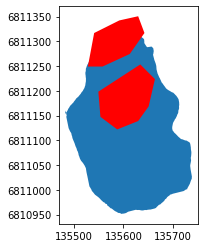

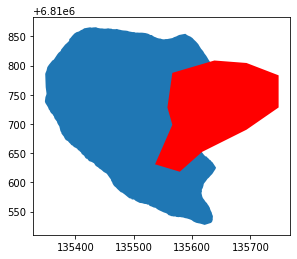

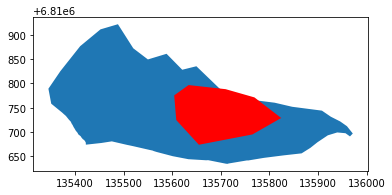

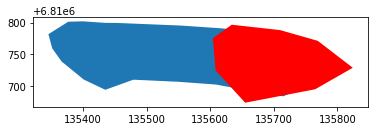

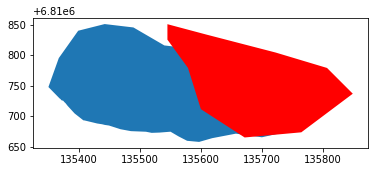

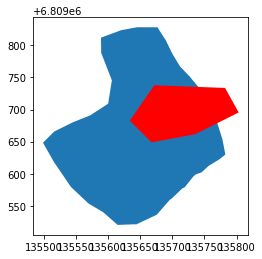

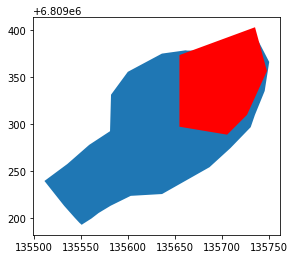

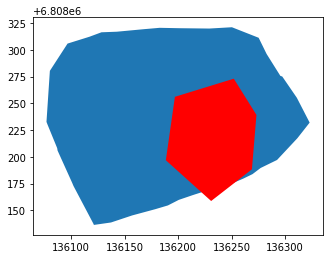

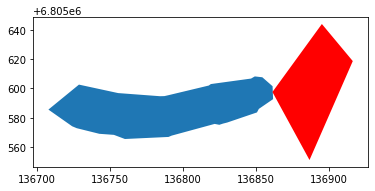

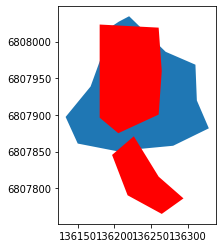

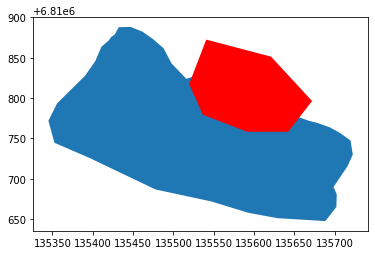

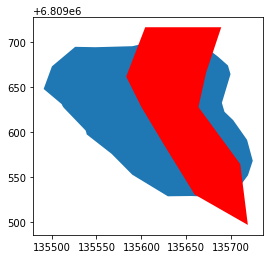

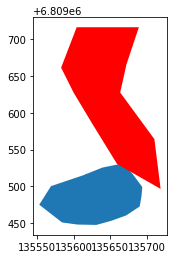

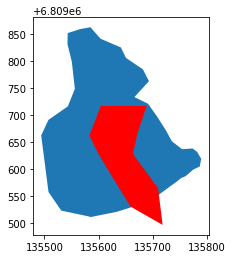

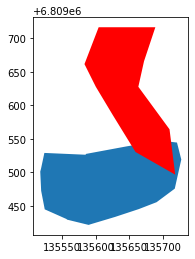

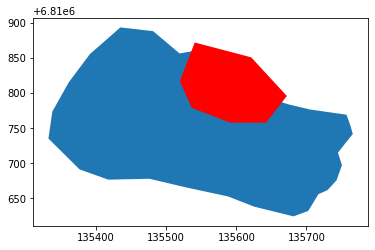

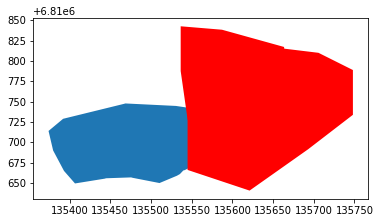

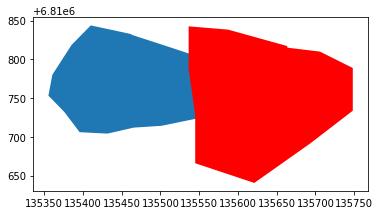

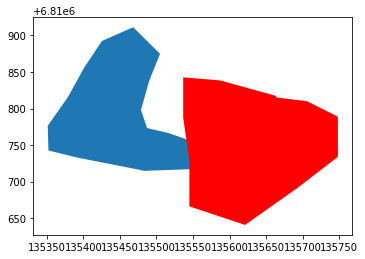

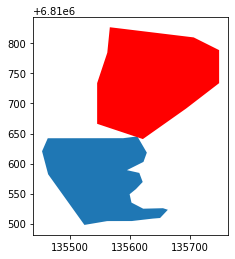

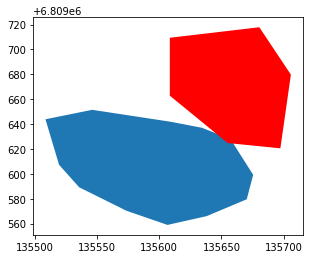

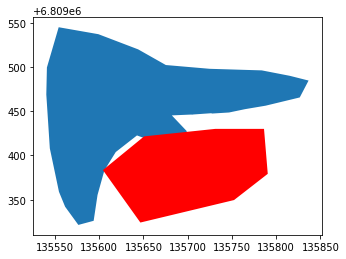

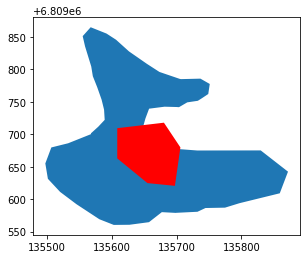

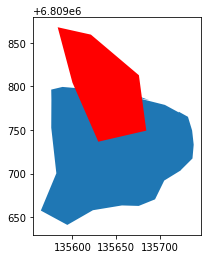

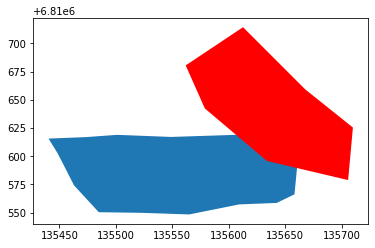

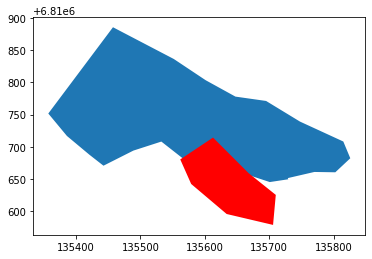

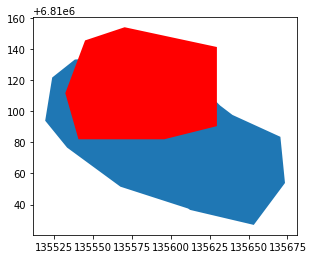

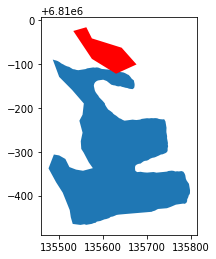

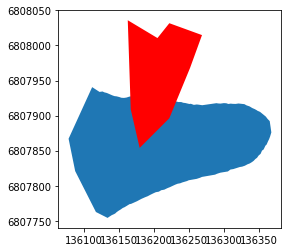

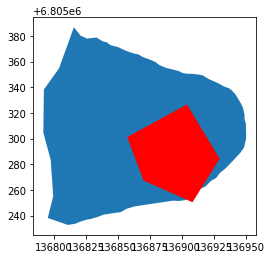

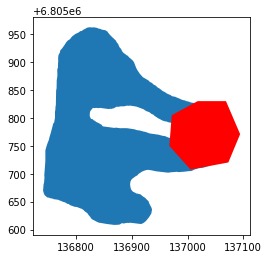

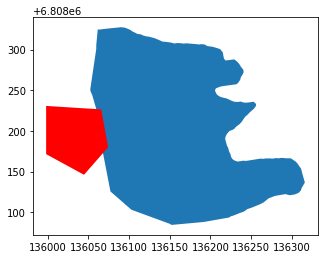

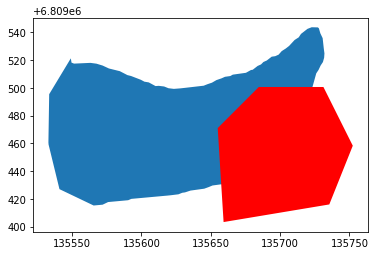

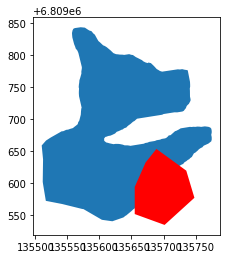

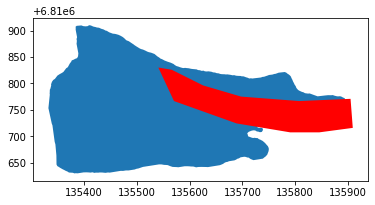

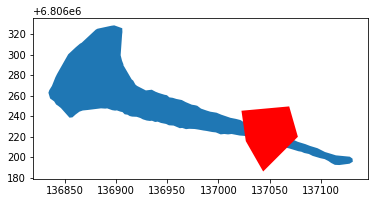

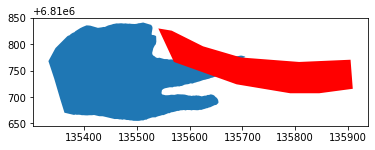

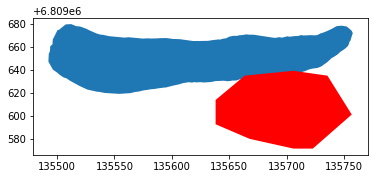

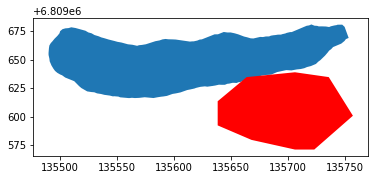

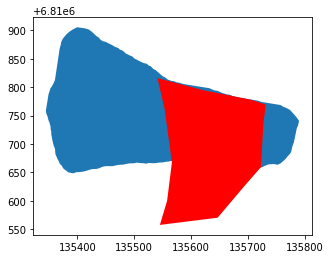

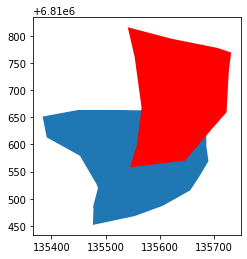

In [10]:
#print(str(match_dict[55]))
for k in match_dict.keys():
    print(k, wys_gdf['d'].iloc[k], match_dict[k])
    ax = wys_gdf.iloc[[k]].plot()
    sat_gdf.iloc[match_dict[k]].plot(ax=ax, color='r')
    plt.gcf().savefig('match_wys{0}_satman{1}.png'.format(k, str(match_dict[k])))

In [ ]:
# Result

In [40]:
#wys["poly_match_man"] = 'No'

# wrong time-interval
#wys.at[(54, 55, 72, 74, 76, 77, 79, 83, 87, 195, 255, 258, 312, 315, 316, 317, 318, 336),'poly_match']='Match'

In [24]:
#wys_satman = gpd.GeoDataFrame(wys, geometry='geometry')
#wys_satman.to_file('wys_satman.shp')